In [2]:
from sklearn import *
import pandas as pd
import numpy as np
import autosklearn.regression

import sklearn.datasets
import sklearn.metrics

import autosklearn.regression

In [72]:
# read seller dataset and split into train/test
gender = pd.read_csv("gender.csv")
math = pd.read_csv("math.csv")

In [70]:
math

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,All Students,39,667.0,2.0,5.1,11.0,28.2,20.0,51.3,6.0,15.4,26.0,66.7
1,01M015,3,2007,All Students,31,672.0,2.0,6.5,3.0,9.7,22.0,71.0,4.0,12.9,26.0,83.9
2,01M015,3,2008,All Students,37,668.0,0.0,0.0,6.0,16.2,29.0,78.4,2.0,5.4,31.0,83.8
3,01M015,3,2009,All Students,33,668.0,0.0,0.0,4.0,12.1,28.0,84.8,1.0,3.0,29.0,87.9
4,01M015,3,2010,All Students,26,677.0,6.0,23.1,12.0,46.2,6.0,23.1,2.0,7.7,8.0,30.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28473,75X723,All Grades,2007,All Students,219,NaN,170.0,77.6,34.0,15.5,13.0,5.9,2.0,0.9,15.0,6.8
28474,75X723,All Grades,2008,All Students,211,NaN,139.0,65.9,46.0,21.8,26.0,12.3,0.0,0.0,26.0,12.3
28475,75X723,All Grades,2009,All Students,209,NaN,88.0,42.1,87.0,41.6,30.0,14.4,4.0,1.9,34.0,16.3
28476,75X723,All Grades,2010,All Students,242,NaN,157.0,64.9,75.0,31.0,10.0,4.1,0.0,0.0,10.0,4.1


In [73]:
gender

,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,Level1_N,Level1_%,Level2_N,Level2_%,Level3_N,Level3_%,Level4_N,Level4_%,Level3+4_N,Level3+4_%
0,01M015,PS 015 ROBERTO CLEMENTE,3,2013,Female,12,285,7,58.3,5,41.7,0,0.0,0,0.0,0,0.0
1,01M015,PS 015 ROBERTO CLEMENTE,3,2013,Male,15,292,7,46.7,6,40.0,2,13.3,0,0.0,2,13.3
2,01M015,PS 015 ROBERTO CLEMENTE,3,2014,Female,13,s,s,s,s,s,s,s,s,s,s,s
3,01M015,PS 015 ROBERTO CLEMENTE,3,2014,Male,5,s,s,s,s,s,s,s,s,s,s,s
4,01M015,PS 015 ROBERTO CLEMENTE,3,2015,Female,7,289,3,42.9,3,42.9,1,14.3,0,0.0,1,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47730,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2015,Male,161,274,98,60.9,52,32.3,11,6.8,0,0.0,11,6.8
47731,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2016,Female,125,286,48,38.4,63,50.4,12,9.6,2,1.6,14,11.2
47732,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2016,Male,141,282,62,44.0,70,49.6,9,6.4,0,0.0,9,6.4
47733,32K562,EVERGREEN MIDDLE SCHOOL FOR URBAN EXPLORATION,All Grades,2017,Female,138,289,49,35.5,70,50.7,14,10.1,5,3.6,19,13.8


In [67]:
gender = gender.astype({'DBN': 'category', 'Year': 'category'})
gender["Mean Scale Score"] = pd.to_numeric(gender["Mean Scale Score"], errors='coerce').fillna(0)

In [19]:
gender.dtypes

DBN                 category
School Name           object
Grade                 object
Year                category
Category              object
Number Tested          int64
Mean Scale Score     float64
Level1_N              object
Level1_%              object
Level2_N              object
Level2_%              object
Level3_N              object
Level3_%              object
Level4_N              object
Level4_%              object
Level3+4_N            object
Level3+4_%            object
dtype: object

In [13]:
gender["Level1_N"] = pd.to_numeric(gender["Level1_N"], errors='coerce')

In [14]:
gender["Level1_N"].isnull().values.any()

True

In [68]:
gender = pd.merge(gender,math,how='inner', on=["DBN","Grade","Year"])
gender = gender.astype({'DBN': 'category'})

In [99]:
gender["Level 4 %"] = pd.to_numeric(gender["Level 4 %"], errors='coerce').fillna(0)

In [5]:
def split_mask(length):
    return np.random.rand(length)

def cross_mask(length, classes):
    return np.random.choice(classes, length)

DBN                     object
School Name             object
Grade                   object
Year_x                category
Category_x              object
Number Tested_x          int64
Mean Scale Score_x     float64
Level1_N                object
Level1_%                object
Level2_N                object
Level2_%                object
Level3_N                object
Level3_%                object
Level4_N                object
Level4_%                object
Level3+4_N              object
Level3+4_%              object
Year_y                   int64
Category_y              object
Number Tested_y          int64
Mean Scale Score_y     float64
Level 1 #              float64
Level 1 %              float64
Level 2 #              float64
Level 2 %              float64
Level 3 #              float64
Level 3 %              float64
Level 4 #              float64
Level 4 %              float64
Level 3+4 #            float64
Level 3+4 %            float64
dtype: object

In [47]:
# train test split
msk = split_mask(len(gender)) < 0.8
gender_train = gender[msk]
gender_test = gender[~msk]

In [48]:
# cross validation
classes = 5
msk = cross_mask(len(gender), classes)
gender_train_CVsets = []
for i in range(classes):
    gender_train_CV = gender[msk != i]
    gender_test_CV = gender[msk == i]
    gender_train_CVsets.append([gender_train_CV, gender_test_CV])

In [58]:
# X_train = gender_train[["Number Tested", "DBN", "Year"]]
# y_train = gender_train["Mean Scale Score"]
# X_test = gender_test[["Number Tested", "DBN", "Year"]]
# y_test = gender_test["Mean Scale Score"]
# X_train = gender_train[["Number Tested", "DBN", "Year", "Level1_N"]]
# y_train = gender_train["Mean Scale Score"]
# X_test = gender_test[["Number Tested", "DBN", "Year", "Level1_N"]]
# y_test = gender_test["Mean Scale Score"]
# X_train = gender_train[["Number Tested_x", "DBN", "Year_x", "Level 4 %"]]
# y_train = gender_train["Mean Scale Score_x"]
# X_test = gender_test[["Number Tested_x", "DBN", "Year_x", "Level 4 %"]]
# y_test = gender_test["Mean Scale Score_x"]

X_train = gender_train[["Number Tested_x", "DBN", "Year", "Level 4 %"]]
y_train = gender_train["Mean Scale Score"]
X_test = gender_test[["Number Tested_x", "DBN", "Year", "Level 4 %"]]
y_test = gender_test["Mean Scale Score"]

KeyError: 'Mean Scale Score'

,DBN,School Name,Grade,Year,Category,Number Tested_x,Mean Scale Score_x,Level1_N,Level1_%,Level2_N,...,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %


In [56]:
%%time
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=60,
    per_run_time_limit=30,
    tmp_folder='./tmp/autosklearn_regression_example_tmp2',
)
automl.fit(X_train, y_train, X_test, y_test, dataset_name='gender')

ValueError: AutoMLRegressor does not support task binary

In [72]:
gender_train = gender_train.astype({'DBN': 'category', 'Year': 'category'})
gender_train["Mean Scale Score"] = pd.to_numeric(gender_train["Mean Scale Score"], errors='coerce').fillna(0)
gender_test = gender_test.astype({'DBN': 'category', 'Year': 'category'})
gender_test["Mean Scale Score"] = pd.to_numeric(gender_test["Mean Scale Score"], errors='coerce').fillna(0)

In [128]:
X_train

,Number Tested_x,DBN,Year_x,Level 4 %
0,12,01M015,2013,15.4
1,12,01M015,2013,12.9
2,12,01M015,2013,5.4
3,12,01M015,2013,3.0
4,12,01M015,2013,7.7
...,...,...,...,...
250825,70,32K554,2017,4.3
250826,70,32K554,2017,6.6
250827,70,32K554,2017,9.3
250828,70,32K554,2017,16.1


In [44]:
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
3            1             0.76  gradient_boosting  0.377124  21.382641
2            2             0.24      random_forest  0.471359  14.118021


In [51]:
%%time
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

AssertionError: X must have more than 1 sample but has 0

In [77]:
poT = automl.performance_over_time_

In [ ]:
Before augmentation: 34s
Train R2 score: 0.6881535542870973
Test R2 score: 0.6358218438158112


Join makes automl slow?
How to deal with missing value?

After augmentation with math: 1 minutes
Train R2 score: 0.8364053040289139
Test R2 score: 0.796080255964835

Prediction time is also larger
user 5min 17s, Wall time: 25.4 s
    


In [53]:
# 5 seconds to find next best augmentation


# one hour with math
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
3            1             0.76  gradient_boosting  0.377124  21.382641
2            2             0.24      random_forest  0.471359  14.118021


<AxesSubplot:title={'center':'Auto-sklearn accuracy over time'}, xlabel='Timestamp'>

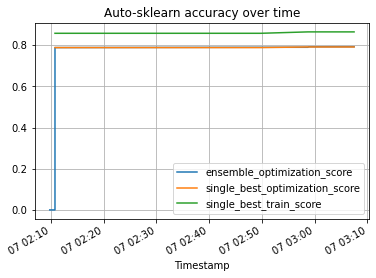

In [142]:
poT = automl.performance_over_time_
poT.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)

<AxesSubplot:title={'center':'Auto-sklearn accuracy over time'}, xlabel='Timestamp'>

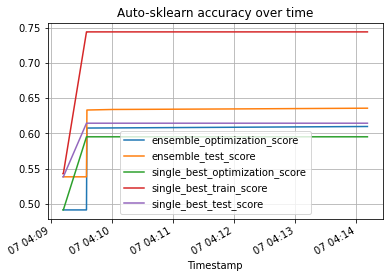

In [151]:
poT = automl.performance_over_time_
poT.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)

<AxesSubplot:title={'center':'Auto-sklearn accuracy over time'}, xlabel='Timestamp'>

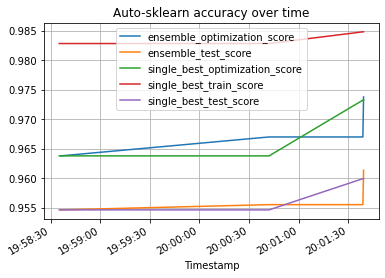

In [31]:
poT = automl.performance_over_time_
poT.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)

<AxesSubplot:title={'center':'Auto-sklearn accuracy over time'}, xlabel='Timestamp'>

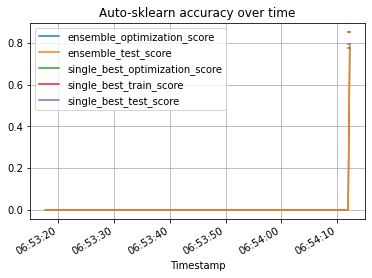

In [36]:
# takes one minute for augmented gender
poT = automl.performance_over_time_
poT.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)